In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy.stats import spearmanr, pearsonr

In [3]:
dbscan_split = torch.load("500e_dbscan_split_overfitting.chkpt", map_location='cpu')
random_split = torch.load("500e_random_split_overfitting.chkpt", map_location='cpu')

In [4]:
final_model = torch.load("data_check.chkpt", map_location = 'cpu')

In [9]:
naive_split = np.load("naive_split.npy")
cluster_split = np.load("dbscan_split.npy")

naive_mean = np.round(np.mean(naive_split), 2)
dbscan_mean = np.round(np.mean(cluster_split), 2)

In [97]:
train_target = np.load("train_target_dist.npy")
test_target = np.load("test_target_dist.npy")

In [99]:
conv3x3 = torch.load("conv3x350e.chkpt", map_location='cpu')
convnet = torch.load("convnet50e.chkpt", map_location='cpu')
resnetsmall = torch.load("ResNet_small50e.chkpt", map_location='cpu')
resnet18 = torch.load("ResNet1850e.chkpt", map_location='cpu')
resnet50 = torch.load("ResNet5050e.chkpt", map_location='cpu')
lstm = torch.load("lstm50e.chkpt", map_location='cpu')

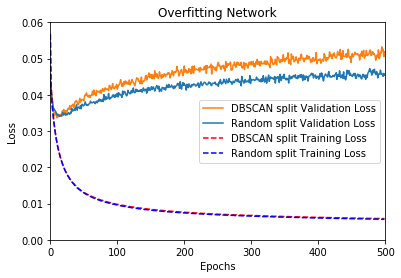

In [128]:
loss_fig, loss_ax = plt.subplots()
line1, = loss_ax.plot(range(500), dbscan_split["valid_losss_chk"], "#ff7f0e",
                      label='DBSCAN split Validation Loss')
line2, = loss_ax.plot(range(500), random_split["valid_losss_chk"], "#1f77b4",
                      label='Random split Validation Loss')
line3, = loss_ax.plot(range(500), dbscan_split["train_losss_chk"], "--r",
                      label='DBSCAN split Training Loss')
line4, = loss_ax.plot(range(500), random_split["train_losss_chk"], "--b",
                      label='Random split Training Loss')
loss_ax.legend(loc='center right')
plt.title('Overfitting Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axis([0, 500, 0, 0.06])

plt.savefig("Overfitting_validationset.png")

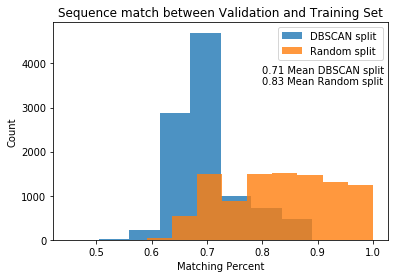

In [6]:
loss_fig, loss_ax = plt.subplots()
hist1 = loss_ax.hist(dbscan_split, alpha = 0.8, label = "DBSCAN split ")
hist2 = loss_ax.hist(naive_split, alpha = 0.8, label = "Random split")
loss_ax.legend(loc='upper right')
plt.title('Sequence match between Validation and Training Set')
plt.xlabel('Matching Percent')
plt.ylabel('Count')
loss_ax.text(0.8, 3520, str(dbscan_mean) + " Mean DBSCAN split" + "\n" + str(naive_mean) + " Mean Random split")

plt.savefig("sequence_match_valid_train.png")

Text(0,0.5,'')

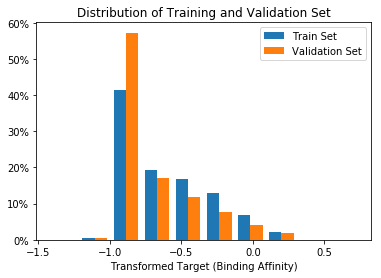

In [98]:
weights = [np.ones_like(train_target) / len(train_target), np.ones_like(test_target) / len(test_target)]
plt.hist([train_target, test_target], weights = weights, label = ["Train Set", "Validation Set"])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='upper right')
plt.title('Distribution of Training and Validation Set')
plt.xlabel('Transformed Target (Binding Affinity)')
plt.ylabel('')

plt.savefig("train_valid_dist.png")

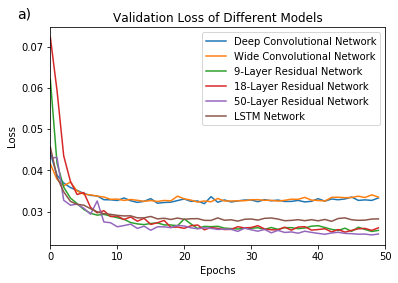

In [154]:
loss_fig, loss_ax = plt.subplots()
line1, = loss_ax.plot(range(50), conv3x3["valid_losss_chk"], 
                      label='Deep Convolutional Network')
line2, = loss_ax.plot(range(50), convnet["valid_losss_chk"],
                      label='Wide Convolutional Network')
line3, = loss_ax.plot(range(50), resnetsmall["valid_losss_chk"],
                      label='9-Layer Residual Network')
line4, = loss_ax.plot(range(50), resnet18["valid_losss_chk"], 
                      label='18-Layer Residual Network')
line5, = loss_ax.plot(range(50), resnet50["valid_losss_chk"], 
                      label='50-Layer Residual Network')
line6, = loss_ax.plot(range(50), lstm["valid_losss_chk"],
                      label='LSTM Network')
loss_ax.legend(loc='upper right')
loss_ax.set_xlim(left = 0, right = 50)
loss_ax.text(-5, 0.077,"a)", fontsize = 14)
plt.title('Validation Loss of Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.savefig("model_selection_valid.png")

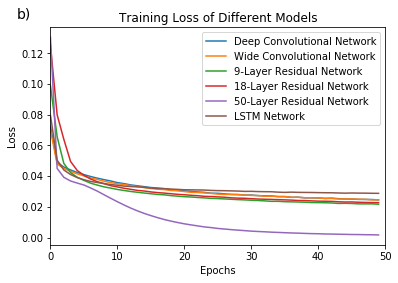

In [155]:
loss_fig, loss_ax = plt.subplots()
line1, = loss_ax.plot(range(50), conv3x3["train_losss_chk"],
                      label='Deep Convolutional Network')
line2, = loss_ax.plot(range(50), convnet["train_losss_chk"],
                      label='Wide Convolutional Network')
line3, = loss_ax.plot(range(50), resnetsmall["train_losss_chk"],
                      label='9-Layer Residual Network')
line4, = loss_ax.plot(range(50), resnet18["train_losss_chk"], 
                      label='18-Layer Residual Network')
line5, = loss_ax.plot(range(50), resnet50["train_losss_chk"], 
                      label='50-Layer Residual Network')
line6, = loss_ax.plot(range(50), lstm["train_losss_chk"],
                      label='LSTM Network')
loss_ax.legend(loc='upper right')
loss_ax.set_xlim(left = 0, right = 50)
loss_ax.text(-5, 0.143,"b)", fontsize = 14)
plt.title('Training Loss of Different Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.savefig("model_selection_train.png")

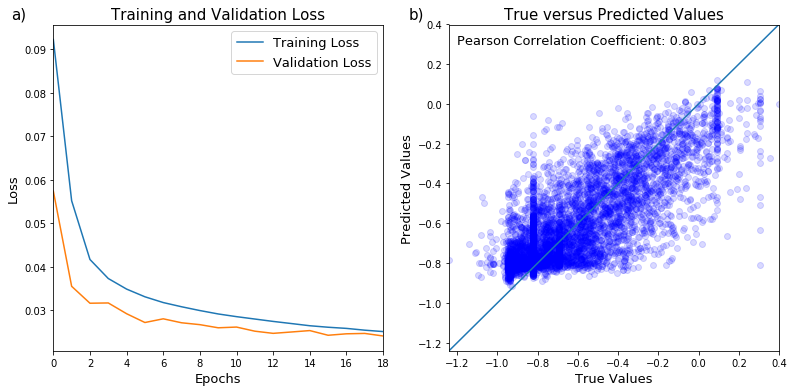

In [120]:
x = range(len(final_model['train_losss_chk'])) 
x_ab = [np.min(final_model['true_valid']), np.max(final_model['true_valid'])]
y_ab = [np.min(final_model['true_valid']), np.max(final_model['true_valid'])]
pearson = round(pearsonr(np.concatenate(final_model['pred_valid']).ravel(), np.concatenate(final_model['true_valid']).ravel())[0], 3)

loss_fig, loss_ax = plt.subplots(1, 2)
loss_fig.set_figheight(6)
loss_fig.set_figwidth(13)
line1, = loss_ax[0].plot(x, final_model['train_losss_chk'],
                label='Training Loss')
line2, = loss_ax[0].plot(x, final_model['valid_losss_chk'],
                label='Validation Loss')
loss_ax[0].legend(loc='upper right', fontsize = 13)
loss_ax[0].set_title('Training and Validation Loss', fontsize = 15)
loss_ax[0].text(-2.3, 0.097,"a)", fontsize = 15)
loss_ax[0].set_xlim(left = 0, right = 18)
loss_ax[0].set_xlabel('Epochs', fontsize = 13)
loss_ax[0].set_ylabel('Loss', fontsize = 13)
#loss_fig, loss_ax = plt.subplots()
line3, = loss_ax[1].plot(np.array(final_model['true_valid']).flatten(), np.array(final_model['pred_valid']).flatten(), 'bo', alpha = 0.15)
line4, = loss_ax[1].plot(x_ab, y_ab)
loss_ax[1].set_xlim(left = min(min(x_ab, y_ab)), right = max(max(x_ab, y_ab)))
loss_ax[1].set_ylim(bottom = min(min(x_ab, y_ab)), top = max(max(x_ab, y_ab)))
loss_ax[1].text(-1.2, 0.3, "Pearson Correlation Coefficient: " + str(pearson), fontsize = 13)
loss_ax[1].set_title('True versus Predicted Values', fontsize = 15)
loss_ax[1].text(-1.44, 0.43,"b)", fontsize = 15)
loss_ax[1].set_xlabel('True Values', fontsize = 13)
loss_ax[1].set_ylabel('Predicted Values', fontsize = 13)

plt.savefig("final_model_plots.png", bbox_inches='tight')

In [9]:
np.load("flurry_bootstrap.npy")

array([ 62095.86272397,  78520.85099627,  75698.72061131,  68776.71397233,
        68886.59594341,  34797.50229163,  63116.67350892,  55532.89241951,
        78493.04996735,  87334.08680411,  45259.96793256,  46185.74826985,
        58494.22360243,  79928.58047485,  48287.36801936,  48533.62179944,
        55371.76483339,  58741.98111441,  62100.65340597,  58572.08774826,
        78183.09004278,  69117.36640436,  72679.84657868,  74138.01649646,
        73233.44346362,  48738.63024274,  70223.88507843,  46005.26720822,
        66429.90417323,  41557.6660323 ,  53910.13478273,  29040.43779948,
        72958.55800468,  61670.46551373,  75164.29871422,  89166.31674256,
        82865.93561811,  70524.32377391,  53821.64367325,  70572.27568995,
        66810.77896842,  50355.74446219,  87170.50196216,  63819.62544707,
        67622.51857503,  66032.51486906,  49472.2375568 ,  83376.97731197,
        77704.54070089,  71384.97110553,  73468.62646781,  97534.56215746,
        68749.25718356,  